In [14]:
import cv2
import mediapipe as mp

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils


In [15]:

# Initialize webcam
cap = cv2.VideoCapture(0)

# Set up MediaPipe Hands with appropriate parameters
with mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=2,
    min_detection_confidence=0.7,
    min_tracking_confidence=0.7) as hands:

    while cap.isOpened():
        # Read frame from webcam
        success, image = cap.read()
        if not success:
            print("Ignoring empty camera frame.")
            continue

        # Flip the image horizontally for a later selfie-view display
        image = cv2.flip(image, 1)

        # Convert the BGR image to RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Process the image and detect hands
        results = hands.process(image_rgb)

        # Draw hand landmarks on the image
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                    mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),
                    mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2))

        # Display the image
        cv2.imshow('Hand Tracking', image)

        # Exit on 'q' key press
        if cv2.waitKey(5) & 0xFF == ord('q'):
            break

# Release the webcam and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

In [16]:
img1=cv2.imread('Hand1.png')
img2=cv2.imread('Hand1.png')
img3=cv2.imread('Hand1.png')

In [17]:
img1

array([[[237, 237, 237],
        [237, 237, 237],
        [214, 214, 214],
        ...,
        [236, 236, 236],
        [205, 205, 205],
        [214, 214, 214]],

       [[237, 237, 237],
        [228, 228, 228],
        [192, 192, 192],
        ...,
        [243, 243, 243],
        [236, 236, 236],
        [192, 192, 192]],

       [[235, 235, 235],
        [198, 198, 198],
        [221, 221, 221],
        ...,
        [243, 243, 243],
        [243, 243, 243],
        [221, 221, 221]],

       ...,

       [[175, 175, 175],
        [171, 171, 187],
        [158, 151, 174],
        ...,
        [ 34,  34,  73],
        [ 36,  35,  76],
        [ 40,  39,  80]],

       [[183, 183, 183],
        [168, 165, 177],
        [159, 151, 174],
        ...,
        [ 35,  35,  76],
        [ 35,  35,  77],
        [ 38,  37,  80]],

       [[194, 194, 194],
        [167, 164, 171],
        [158, 150, 173],
        ...,
        [ 38,  39,  79],
        [ 36,  37,  78],
        [ 38,  38,  80]]

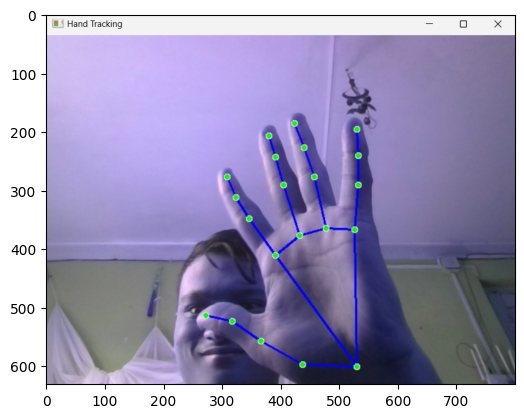

In [18]:
import matplotlib.pyplot as plt 
plt.imshow(img1)

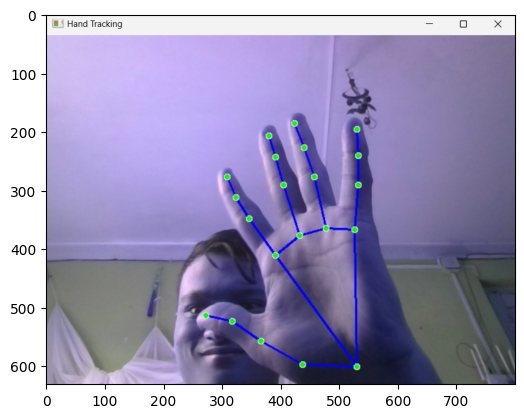

In [19]:
plt.imshow(img2)

In [20]:

# Load the image
img3 = cv2.imread('hand3.png')

# Check if the image was loaded successfully
if img1 is None:
    print("Error: Could not load image. Please check the file path.")
    exit()

# Resize the image for better display (optional)
resized_img = cv2.resize(img3, (800, 600))  # Adjust the size as needed

# Add a title to the image window
window_title = "Professional Image Display - Hand1"

# Display the image in a resizable window
cv2.namedWindow(window_title, cv2.WINDOW_NORMAL)  # WINDOW_NORMAL allows resizing
cv2.imshow(window_title, resized_img)

# Add a label to the image (optional)
label_text = "Hand Image"
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_color = (255, 255, 255)  # White color
font_thickness = 2
cv2.putText(resized_img, label_text, (50, 50), font, font_scale, font_color, font_thickness)

# Update the window with the labeled image
cv2.imshow(window_title, resized_img)

# Wait for a key press and close the window
cv2.waitKey(0)
cv2.destroyAllWindows()

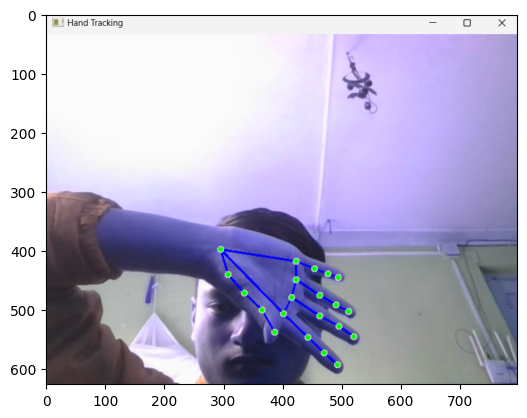

In [21]:
plt.imshow(img3)

In [22]:
import cv2
import mediapipe as mp
import numpy as np
from ctypes import cast, POINTER
from comtypes import CLSCTX_ALL
from pycaw.pycaw import AudioUtilities, IAudioEndpointVolume

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Initialize webcam
cap = cv2.VideoCapture(0)

# Initialize pycaw for volume control
devices = AudioUtilities.GetSpeakers()
interface = devices.Activate(IAudioEndpointVolume._iid_, CLSCTX_ALL, None)
volume = cast(interface, POINTER(IAudioEndpointVolume))

# Get volume range
vol_range = volume.GetVolumeRange()
min_vol, max_vol = vol_range[0], vol_range[1]

# Set up MediaPipe Hands with appropriate parameters
with mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=1,  # Only one hand for simplicity
    min_detection_confidence=0.7,
    min_tracking_confidence=0.7) as hands:

    while cap.isOpened():
        # Read frame from webcam
        success, image = cap.read()
        if not success:
            print("Ignoring empty camera frame.")
            continue

        # Flip the image horizontally for a later selfie-view display
        image = cv2.flip(image, 1)

        # Convert the BGR image to RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Process the image and detect hands
        results = hands.process(image_rgb)

        # Draw hand landmarks and control volume
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                # Draw landmarks on the image
                mp_drawing.draw_landmarks(
                    image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                    mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),
                    mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2))

                # Get landmark positions for thumb and index finger
                thumb_tip = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP]
                index_tip = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP]

                # Convert landmark positions to pixel coordinates
                h, w, _ = image.shape
                thumb_x, thumb_y = int(thumb_tip.x * w), int(thumb_tip.y * h)
                index_x, index_y = int(index_tip.x * w), int(index_tip.y * h)

                # Draw circles at thumb and index finger tips
                cv2.circle(image, (thumb_x, thumb_y), 10, (255, 0, 0), -1)
                cv2.circle(image, (index_x, index_y), 10, (255, 0, 0), -1)

                # Calculate distance between thumb and index finger tips
                distance = np.hypot(index_x - thumb_x, index_y - thumb_y)

                # Map distance to volume range
                vol = np.interp(distance, [30, 200], [min_vol, max_vol])
                volume.SetMasterVolumeLevel(vol, None)

                # Display volume level on the image
                cv2.putText(image, f"Volume: {int(np.interp(vol, [min_vol, max_vol], [0, 100]))}%",
                            (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

        # Display the image
        cv2.imshow('Gesture Volume Control', image)

        # Exit on 'q' key press
        if cv2.waitKey(5) & 0xFF == ord('q'):
            break

# Release the webcam and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

In [23]:
import cv2
import mediapipe as mp
import numpy as np
from ctypes import cast, POINTER
from comtypes import CLSCTX_ALL
from pycaw.pycaw import AudioUtilities, IAudioEndpointVolume

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Initialize webcam
cap = cv2.VideoCapture(0)

# Initialize pycaw for volume control
devices = AudioUtilities.GetSpeakers()
interface = devices.Activate(IAudioEndpointVolume._iid_, CLSCTX_ALL, None)
volume = cast(interface, POINTER(IAudioEndpointVolume))

# Get volume range
vol_range = volume.GetVolumeRange()
min_vol, max_vol = vol_range[0], vol_range[1]

# Set up MediaPipe Hands with appropriate parameters
with mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=1,  # Only one hand for simplicity
    min_detection_confidence=0.7,
    min_tracking_confidence=0.7) as hands:

    while cap.isOpened():
        # Read frame from webcam
        success, image = cap.read()
        if not success:
            print("Ignoring empty camera frame.")
            continue

        # Flip the image horizontally for a later selfie-view display
        image = cv2.flip(image, 1)

        # Convert the BGR image to RGB for MediaPipe processing
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Process the image and detect hands
        results = hands.process(image_rgb)

        # Draw hand landmarks and control volume
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                # Draw landmarks on the image
                mp_drawing.draw_landmarks(
                    image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                    mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),
                    mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2))

                # Get landmark positions for thumb and index finger
                thumb_tip = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP]
                index_tip = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP]

                # Convert landmark positions to pixel coordinates
                h, w, _ = image.shape
                thumb_x, thumb_y = int(thumb_tip.x * w), int(thumb_tip.y * h)
                index_x, index_y = int(index_tip.x * w), int(index_tip.y * h)

                # Draw circles at thumb and index finger tips
                cv2.circle(image, (thumb_x, thumb_y), 10, (255, 0, 0), -1)
                cv2.circle(image, (index_x, index_y), 10, (255, 0, 0), -1)

                # Calculate distance between thumb and index finger tips
                distance = np.hypot(index_x - thumb_x, index_y - thumb_y)

                # Map distance to volume range
                vol = np.interp(distance, [30, 200], [min_vol, max_vol])
                volume.SetMasterVolumeLevel(vol, None)

                # Display volume level on the image
                cv2.putText(image, f"Volume: {int(np.interp(vol, [min_vol, max_vol], [0, 100]))}%",
                            (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

        # Convert the final image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Display the grayscale image
        cv2.imshow('Gesture Volume Control (Grayscale)', gray_image)

        # Exit on 'q' key press
        if cv2.waitKey(5) & 0xFF == ord('q'):
            break

# Release the webcam and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

In [24]:
import cv2
import mediapipe as mp
import numpy as np
from ctypes import cast, POINTER
from comtypes import CLSCTX_ALL
from pycaw.pycaw import AudioUtilities, IAudioEndpointVolume

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Initialize webcam
cap = cv2.VideoCapture(0)

# Initialize pycaw for volume control
devices = AudioUtilities.GetSpeakers()
interface = devices.Activate(IAudioEndpointVolume._iid_, CLSCTX_ALL, None)
volume = cast(interface, POINTER(IAudioEndpointVolume))

# Get volume range
vol_range = volume.GetVolumeRange()
min_vol, max_vol = vol_range[0], vol_range[1]

# Set up MediaPipe Hands with appropriate parameters
with mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=1,  # Only one hand for simplicity
    min_detection_confidence=0.7,
    min_tracking_confidence=0.7) as hands:

    while cap.isOpened():
        # Read frame from webcam
        success, image = cap.read()
        if not success:
            print("Ignoring empty camera frame.")
            continue

        # Flip the image horizontally for a later selfie-view display
        image = cv2.flip(image, 1)

        # Convert the BGR image to RGB for MediaPipe processing
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Process the image and detect hands
        results = hands.process(image_rgb)

        # Convert the original image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)  # Convert back to BGR for colored overlays

        # Draw hand landmarks and control volume
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                # Draw landmarks on the grayscale image (in green)
                mp_drawing.draw_landmarks(
                    gray_image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                    mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),  # Green landmarks
                    mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2))  # Green connections

                # Get landmark positions for thumb and index finger
                thumb_tip = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP]
                index_tip = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP]

                # Convert landmark positions to pixel coordinates
                h, w, _ = image.shape
                thumb_x, thumb_y = int(thumb_tip.x * w), int(thumb_tip.y * h)
                index_x, index_y = int(index_tip.x * w), int(index_tip.y * h)

                # Draw circles at thumb and index finger tips (in green)
                cv2.circle(gray_image, (thumb_x, thumb_y), 10, (0, 255, 0), -1)  # Green circle
                cv2.circle(gray_image, (index_x, index_y), 10, (0, 255, 0), -1)  # Green circle

                # Calculate distance between thumb and index finger tips
                distance = np.hypot(index_x - thumb_x, index_y - thumb_y)

                # Map distance to volume range
                vol = np.interp(distance, [30, 200], [min_vol, max_vol])
                volume.SetMasterVolumeLevel(vol, None)

                # Display volume level on the image (in green)
                cv2.putText(gray_image, f"Volume: {int(np.interp(vol, [min_vol, max_vol], [0, 100]))}%",
                            (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)  # Green text

        # Display the final image
        cv2.imshow('Gesture Volume Control (Grayscale with Green Hand)', gray_image)

        # Exit on 'q' key press
        if cv2.waitKey(5) & 0xFF == ord('q'):
            break

# Release the webcam and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

In [26]:

# Load the images
img7 = cv2.imread('hand4.png')
img8 = cv2.imread('hand5.png')
img9 = cv2.imread('hand6.png')

# Convert images from BGR to RGB
img7_rgb = cv2.cvtColor(img7, cv2.COLOR_BGR2RGB)
img8_rgb = cv2.cvtColor(img8, cv2.COLOR_BGR2RGB)
img9_rgb = cv2.cvtColor(img9, cv2.COLOR_BGR2RGB)

# Create a figure with subplots to display multiple images
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed

# Display the first image
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
plt.imshow(img7_rgb)
plt.title('Hand 4')
plt.axis('off')  # Hide the axis

# Display the second image
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
plt.imshow(img8_rgb)
plt.title('Hand 5')
plt.axis('off')  # Hide the axis

# Display the third image
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
plt.imshow(img9_rgb)
plt.title('Hand 6')
plt.axis('off')  # Hide the axis

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
